# Pengantar Pembelajaran Mesin


---
## Klasifikasi Dataset Jantung
Kelompok 10
1. Naufal Putra Sutrisna / 215150201111001
2. Bagas Antarino Putra / 215150200111006
3. Rafifa Addin Sahirah / 215150200111007
4. Muhammad Fadli Hasan / 215150200111063







### Import Data

In [ ]:
from google.colab import files
upload = files.upload()
for fn in upload.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(
      name=fn, length=len(upload[fn])))

Saving heart.csv to heart (1).csv
Nama file "heart.csv" dengan panjang 38114 bytes


### Membaca Data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Mengubah value pada fitur target. Fitur target merupakan keterangan apakah pasien mempunyai penyakit jantung atau tidak.

1 = Yes

0 = No

In [ ]:
data['target'] = data['target'].replace([1, 0], ['Yes', 'No'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No


### Explorasi Data

In [ ]:
data.shape[0]

1025

Menghitung banyaknya target pada setiap nilai

In [ ]:
data.target.value_counts()

Yes    526
No     499
Name: target, dtype: int64

Melakukan plot pada fitur target

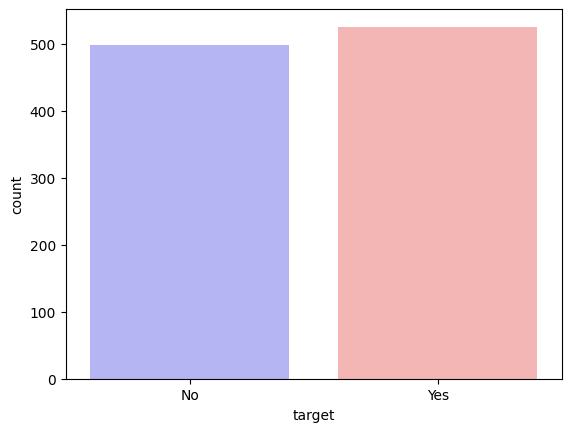

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [ ]:
countNo = len(data[data.target == 'No'])
countYes = len(data[data.target == 'Yes'])
print("Persentase pasien yang mempunyai penyakit jantung: {:.2f}%".format((countNo / (len(data.target))*100)))
print("Persentase pasien yang tidak mempunyai penyakit jantung: {:.2f}%".format((countYes / (len(data.target))*100)))

Persentase pasien yang mempunyai penyakit jantung: 48.68%
Persentase pasien yang tidak mempunyai penyakit jantung: 51.32%


Melakukan plot pada fitur sex

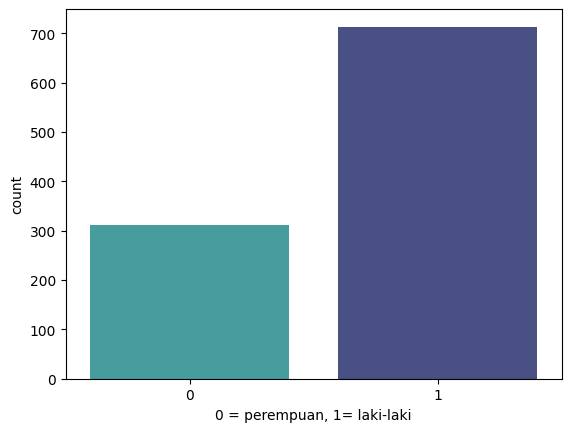

In [ ]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("0 = perempuan, 1= laki-laki")
plt.show()

In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Persentase pasien perempuan: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Persentase pasien laki-laki: {:.2f}%".format((countMale / (len(data.sex))*100)))

Persentase pasien perempuan: 30.44%
Persentase pasien laki-laki: 69.56%


Melakukan plot untuk frekuensi penyakit jantung berdasarkan umur

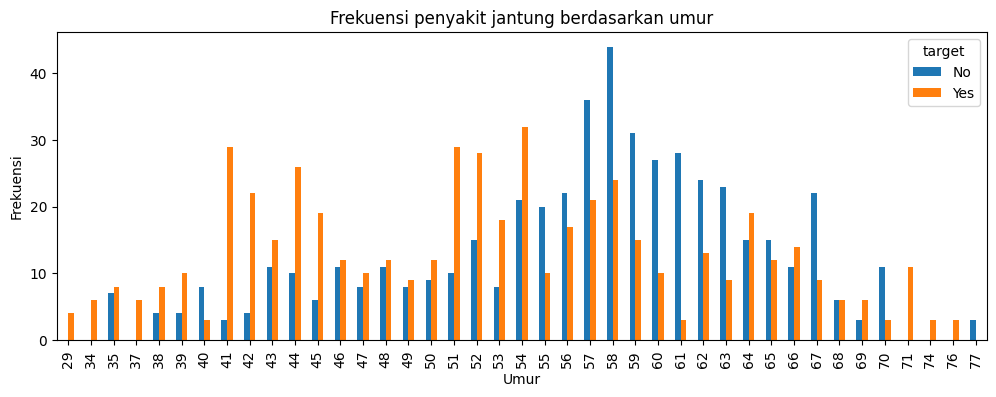

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(12,4))
plt.title('Frekuensi penyakit jantung berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Melakukan plot untuk frekuensi penyakit jantung berdasarkan jenis kelamin

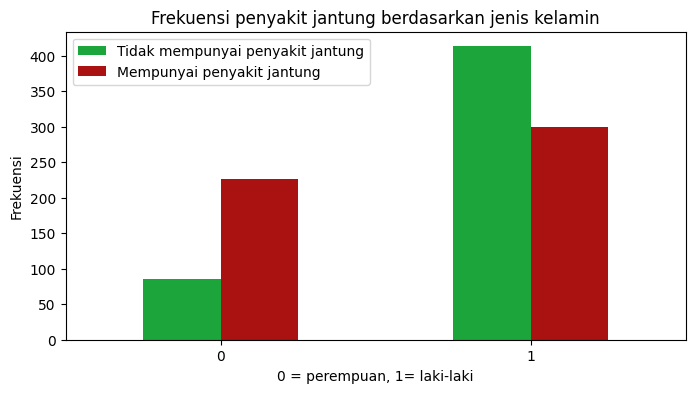

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(8,4),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi penyakit jantung berdasarkan jenis kelamin')
plt.xlabel("0 = perempuan, 1= laki-laki")
plt.xticks(rotation=0)
plt.legend(["Tidak mempunyai penyakit jantung", "Mempunyai penyakit jantung"])
plt.ylabel('Frekuensi')
plt.show()

Melakukan plot fitur thalach (Detak Jantung) dengan fitur age (Umur)

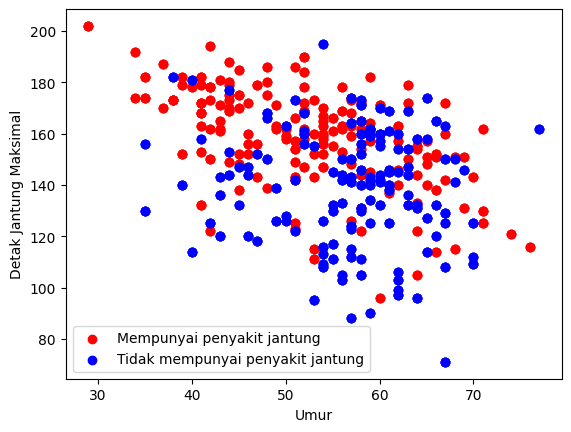

In [ ]:
plt.scatter(x=data.age[data.target=='Yes'], y=data.thalach[(data.target=='Yes')], c="red")
plt.scatter(x=data.age[data.target=='No'], y=data.thalach[(data.target=='No')], c="blue")
plt.legend(["Mempunyai penyakit jantung", "Tidak mempunyai penyakit jantung"])
plt.xlabel("Umur")
plt.ylabel("Detak Jantung Maksimal")
plt.show()

### Melakukan pengecekan apakah terdapat nilai NaN pada setiap fitur

In [ ]:
data.isna().values.any()

False

### Melakukan pengecekan apakah terdapat nilai 0 pada fitur age, trestbps, chol, dan thalach

In [ ]:
cond1 = data['age'] == 0.0
cond2 = data['trestbps'] == 0.0
cond3 = data['chol'] == 0.0
cond4 = data['thalach'] == 0.0
data.loc[cond1 | cond2 | cond3 | cond4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### Melihat rentang nilai pada masing masing fitur.
Rentang nilai diperoleh dengan nilai max - min

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Melakukan normalisasi minmax agar menyamaratakan rentang masing masing fitur

In [ ]:
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return df_input

In [ ]:
data_normal = minmax(data)

In [ ]:
data_normal.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.314146,0.354827,0.273973,0.149268,0.264878,0.596291,0.336585,0.172825,0.692683,0.188537,0.774634
std,0.189006,0.460373,0.343214,0.165252,0.117791,0.356527,0.263939,0.175616,0.472772,0.189525,0.308878,0.257699,0.206887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.465649,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.562500,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.618321,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.340183,0.000000,0.500000,0.725191,1.000000,0.290323,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Membagi data menjadi data latih dan data uji sebanyak 80% dan 20%

In [ ]:
from sklearn.model_selection import train_test_split
data_latih,data_uji = train_test_split(data_normal,test_size=0.2)

In [ ]:
print(data_uji.shape[0])
print(data_latih.shape[0])

205
820


## Memisahkan label dari data uji

In [ ]:
label_uji = data_uji.pop('target')

In [ ]:
data_uji.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
436,0.625000,0.0,0.000000,0.754717,0.280822,0.0,0.5,0.549618,1.0,0.000000,0.5,0.00,0.666667
835,0.416667,1.0,0.666667,0.226415,0.052511,0.0,0.0,0.419847,0.0,0.129032,1.0,0.75,0.666667
179,0.562500,0.0,0.000000,0.377358,0.646119,0.0,0.0,0.603053,1.0,0.306452,0.5,0.50,1.000000
170,0.291667,1.0,0.000000,0.528302,0.276256,0.0,0.5,0.763359,0.0,0.241935,1.0,0.00,0.666667
159,0.250000,1.0,0.333333,0.245283,0.070776,0.0,0.5,0.847328,0.0,0.000000,1.0,0.00,0.666667


# Algoritma Naive Bayes

P(c|d) = (P(c)*P(d|c))/P(d)

Keterangan:
*   P (c|d) : posterior, yaitu peluang kelas ​c​ diberikan data ​d
*   P (c) : prior, yaitu peluang awal munculnya kelas ​c
*   P (d|c) : likelihood atau conditional probability
*   P (d) : evidence, yaitu peluang munculnya data ​d

## Menghitung Prior

In [ ]:
from collections import  Counter
def hitung_prior(list_kelas):
  n_data = len(list_kelas)
  prior = Counter(list_kelas)
  for key in prior.keys():
    prior[key]=prior[key]/n_data
  return prior

In [ ]:
prior = hitung_prior(data_latih['target'])
print(prior)

Counter({'Yes': 0.5109756097560976, 'No': 0.48902439024390243})


## Menghitung Likelihood

In [ ]:
def hitung_rata2_std_kelas(input_data):
  list_columns = input_data.columns[:-1]
  class_column_name = input_data.columns[-1]
  list_class = set(input_data[class_column_name])
  rata2 = {}
  std = {}
  for column in list_columns:
    for a_class in list_class:
      rata2[(a_class,column)] = input_data.loc[input_data[class_column_name]==a_class][column].mean()
      std[(a_class,column)] = input_data.loc[input_data[class_column_name]==a_class][column].std()
  return(rata2,std)

In [ ]:
import math
def hitung_likelihood_gaussian(data,rata2,std):
  hasil = (1/math.sqrt(2*math.pi*(std**2)))*math.exp((-1*((data-rata2)**2))/(2*(std**2)))
  return hasil

## Proses Training

In [ ]:
def training_naive_bayes_gaussian(data_latih):
  class_column_name = data_latih.columns[-1]
  prior = hitung_prior(data_latih[class_column_name])
  (rata2,std) = hitung_rata2_std_kelas(data_latih)
  list_class = set(data_latih[class_column_name])
  list_columns = data_latih.columns[:-1]
  model = {}
  model['prior'] = prior
  model['rata2'] = rata2
  model['std'] = std
  model['list_class'] = list_class
  model['list_columns'] = list_columns
  return model

In [ ]:
model = training_naive_bayes_gaussian(data_latih)

## Proses Testing

In [ ]:
def testing_naive_bayes_gaussian(model,data_uji):
  prior = model['prior']
  rata2 = model['rata2']
  std = model['std']
  list_class = model['list_class']
  list_columns = model['list_columns']
  posterior = dict.fromkeys(list_class,1)
  for a_class in list_class:
    for column in list_columns:
      posterior[a_class] = posterior[a_class]*hitung_likelihood_gaussian(data_uji[column],rata2[(a_class,column)],std[(a_class,column)])
    posterior[a_class] = posterior[a_class]*prior[a_class]
  kelas_uji = max(posterior,key=posterior.get)
  return kelas_uji

Melakukan testing pada indeks ke 0

In [ ]:
indeks_uji = 0
prediksi = testing_naive_bayes_gaussian(model,data_uji.iloc[indeks_uji])
print(prediksi)
print(label_uji.iloc[indeks_uji])

No
No


Melakukan testing pada data uji

In [ ]:
prediksi_total = []
for indeks in range(data_uji.shape[0]):
  prediksi_total.append(testing_naive_bayes_gaussian(model,data_uji.iloc[indeks]))
print("Total data yang diprediksi: ",data_uji.shape[0])
print("Total prediksi benar: ",sum(prediksi_total==label_uji))

Total data yang diprediksi:  205
Total prediksi benar:  175


In [ ]:
print("Akurasi metode Naive Bayes adalah: {:.2f}%".format(sum(prediksi_total==label_uji)/data_uji.shape[0]*100))

Akurasi metode Naive Bayes adalah: 85.37%
